In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prondict import prondict
from lab2_proto import *
from lab2_tools import *
import warnings

In [2]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

data = np.load('lab2_data.npz', allow_pickle=True)['data']
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()
all_spkr_phone_HMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
one_spkr_phone_HMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()

# Print keys for each .npz file
print("Keys in 'lab2_data.npz':", list(data[1].keys()))
print("Keys in 'lab2_example.npz':", list(example.keys()))
print("Keys in 'lab2_models_all.npz':", list(all_spkr_phone_HMMs.keys()))
print("Keys in 'lab2_models_onespkr.npz':", list(one_spkr_phone_HMMs.keys()))


Keys in 'lab2_data.npz': ['filename', 'samplingrate', 'gender', 'speaker', 'digit', 'repetition', 'samples', 'lmfcc']
Keys in 'lab2_example.npz': ['filename', 'samplingrate', 'gender', 'speaker', 'digit', 'repetition', 'samples', 'lmfcc', 'obsloglik', 'logalpha', 'loglik', 'vloglik', 'vpath', 'logbeta', 'loggamma']
Keys in 'lab2_models_all.npz': ['f', 'k', 'n', 'r', 's', 't', 'v', 'w', 'z', 'ah', 'ao', 'ay', 'eh', 'ey', 'ih', 'iy', 'ow', 'sp', 'th', 'uw', 'sil']
Keys in 'lab2_models_onespkr.npz': ['f', 'k', 'n', 'r', 's', 't', 'v', 'w', 'z', 'ah', 'ao', 'ay', 'eh', 'ey', 'ih', 'iy', 'ow', 'sp', 'th', 'uw', 'sil']


In [3]:
# Concat
isolated = {}
for digit in prondict.keys():
  isolated[digit] = ["sil"] + prondict[digit] + ["sil"]

print(isolated)

all_spkr_word_HMMs, one_spkr_word_HMMs = {}, {}
all_spkr_word_HMMs["o"] = concatHMMs(all_spkr_phone_HMMs, isolated["o"])
one_spkr_word_HMMs["o"] = concatHMMs(all_spkr_phone_HMMs, isolated["o"])

{'o': ['sil', 'ow', 'sil'], 'z': ['sil', 'z', 'iy', 'r', 'ow', 'sil'], '1': ['sil', 'w', 'ah', 'n', 'sil'], '2': ['sil', 't', 'uw', 'sil'], '3': ['sil', 'th', 'r', 'iy', 'sil'], '4': ['sil', 'f', 'ao', 'r', 'sil'], '5': ['sil', 'f', 'ay', 'v', 'sil'], '6': ['sil', 's', 'ih', 'k', 's', 'sil'], '7': ['sil', 's', 'eh', 'v', 'ah', 'n', 'sil'], '8': ['sil', 'ey', 't', 'sil'], '9': ['sil', 'n', 'ay', 'n', 'sil']}


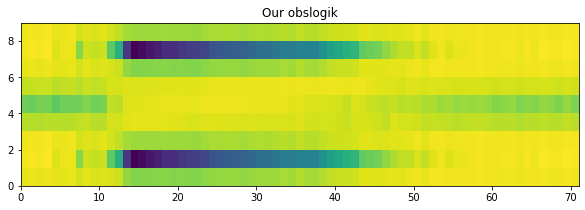

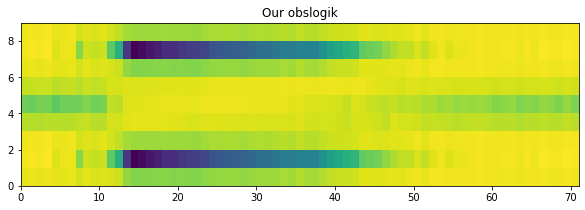

In [4]:
# Gaussian Plot
all_obsloglik = log_multivariate_normal_density_diag(example["lmfcc"], all_spkr_word_HMMs["o"]["means"], all_spkr_word_HMMs["o"]["covars"])
one_obsloglik = log_multivariate_normal_density_diag(example["lmfcc"], one_spkr_word_HMMs["o"]["means"], one_spkr_word_HMMs["o"]["covars"])

fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(all_obsloglik.T, cmap='viridis')
ax.set_title('Our obslogik')
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(one_obsloglik.T, cmap='viridis')
ax.set_title('Our obslogik')
plt.show()

In [5]:
# Debugging 
print("Shape of log_startprob:", np.log(one_spkr_word_HMMs["o"]["startprob"]).shape)
print("Shape of log_emlik[0]:", example["obsloglik"][0].shape)


Shape of log_startprob: (10,)
Shape of log_emlik[0]: (9,)


In [6]:
# # Adjusted use of log_startprob by excluding the non-emitting state's probability
# adjusted_startprob = np.log(one_spkr_word_HMMs["o"]["startprob"][:-1])
# # Adjusting the transition matrix by removing the last row and column
# adjusted_transmat = np.log(one_spkr_word_HMMs["o"]["transmat"][:-1, :-1])


# # Recalculate forward probabilities with adjusted start probabilities
# logalpha = forward(example["obsloglik"], np.log(one_spkr_word_HMMs["o"]["startprob"]), np.log(one_spkr_word_HMMs["o"]["transmat"]))

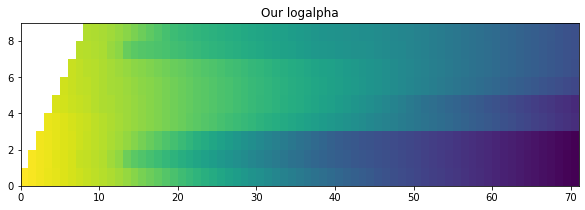

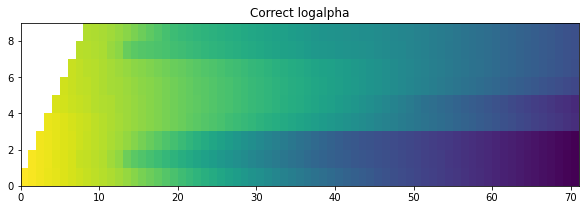

In [7]:
# Forward
logalpha = forward(example["obsloglik"], np.log(one_spkr_word_HMMs["o"]["startprob"]), np.log(one_spkr_word_HMMs["o"]["transmat"]))
fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(logalpha.T, cmap='viridis')
ax.set_title('Our logalpha')
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(example["logalpha"].T, cmap='viridis')
ax.set_title('Correct logalpha')
plt.show()


In [8]:
# Backward
logbeta = backward(one_obsloglik, np.log(one_spkr_word_HMMs['o']['startprob']), np.log(one_spkr_word_HMMs['o']['transmat']))

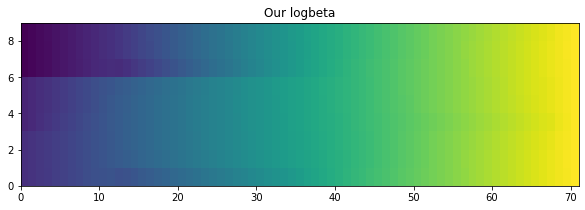

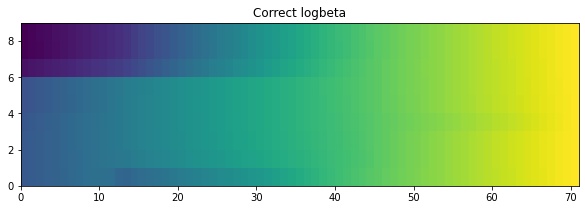

In [9]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(logbeta.T, cmap='viridis')
ax.set_title('Our logbeta')
plt.show()

fig, ax = plt.subplots(figsize=(10, 3))
ax.pcolormesh(example["logbeta"].T, cmap='viridis')
ax.set_title('Correct logbeta')
plt.show()

In [10]:
# Viterbi


In [11]:
# Baum-welch